In [1]:
import pandas as pd

df = pd.read_csv('data/loan_data_sample.csv', index_col='SK_ID_CURR')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
SK_ID_CURR,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [2]:
numeric_df = df.copy()
numeric_df['NAME_CONTRACT_TYPE'] = numeric_df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
numeric_df['CODE_GENDER'] = numeric_df['CODE_GENDER'].map({'M': 0, 'F': 1})
numeric_df['FLAG_OWN_CAR'] = numeric_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
numeric_df['FLAG_OWN_REALTY'] = numeric_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
numeric_df['NAME_EDUCATION_TYPE'] = numeric_df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 0,
                                                                           'Secondary / secondary special': 0,
                                                                           'Incomplete higher': 1,
                                                                           'Higher education': 2,
                                                                           'Academic degree': 2})
numeric_df.dropna(inplace=True)

In [3]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 100002 to 456255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307217 non-null  int64  
 1   NAME_CONTRACT_TYPE   307217 non-null  int64  
 2   CODE_GENDER          307217 non-null  float64
 3   FLAG_OWN_CAR         307217 non-null  int64  
 4   FLAG_OWN_REALTY      307217 non-null  int64  
 5   CNT_CHILDREN         307217 non-null  int64  
 6   AMT_INCOME_TOTAL     307217 non-null  float64
 7   AMT_CREDIT           307217 non-null  float64
 8   AMT_ANNUITY          307217 non-null  float64
 9   AMT_GOODS_PRICE      307217 non-null  float64
 10  NAME_EDUCATION_TYPE  307217 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 28.1 MB


<AxesSubplot:ylabel='Frequency'>

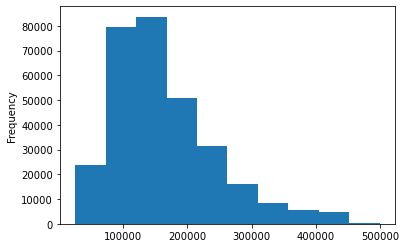

In [4]:
numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000]['AMT_INCOME_TOTAL'].plot.hist()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

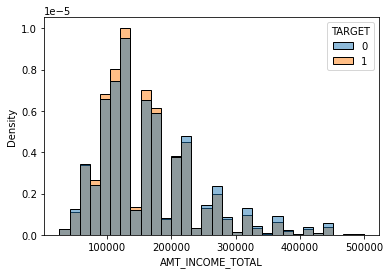

In [5]:
import seaborn as sns

sns.histplot(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000],
             x='AMT_INCOME_TOTAL',
             hue='TARGET',
             common_norm=False,
             stat='density',
             bins=30)

Fractions of data in the split nodes from example 1

In [6]:
print(numeric_df['TARGET'].value_counts())
print(numeric_df['TARGET'].value_counts(normalize=True))

0    282413
1     24804
Name: TARGET, dtype: int64
0    0.919262
1    0.080738
Name: TARGET, dtype: float64


In [7]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts(normalize=True))

0    200816
1     18532
Name: TARGET, dtype: int64
0    0.915513
1    0.084487
Name: TARGET, dtype: float64


In [8]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts(normalize=True))

0    81597
1     6272
Name: TARGET, dtype: int64
0    0.928621
1    0.071379
Name: TARGET, dtype: float64


Gini calculations for the split nodes from the example in figure 1.

In [9]:
1 - 0.92 ** 2 - 0.08 ** 2

0.14719999999999997

In [10]:
1 - 0.93 ** 2 - 0.07 ** 2

0.1301999999999999

## Fitting a decision tree

In [11]:
from sklearn.model_selection import train_test_split

features = numeric_df.drop('TARGET', axis=1)
targets = numeric_df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9835772442407513
0.857092637198099


In [13]:
dt.get_depth()

50

In [14]:
small_dt = DecisionTreeClassifier(max_depth=2, max_features=None)
small_dt.fit(x_train, y_train)
print(small_dt.score(x_train, y_train))
print(small_dt.score(x_test, y_test))

0.9192620176032499
0.9192630688106244


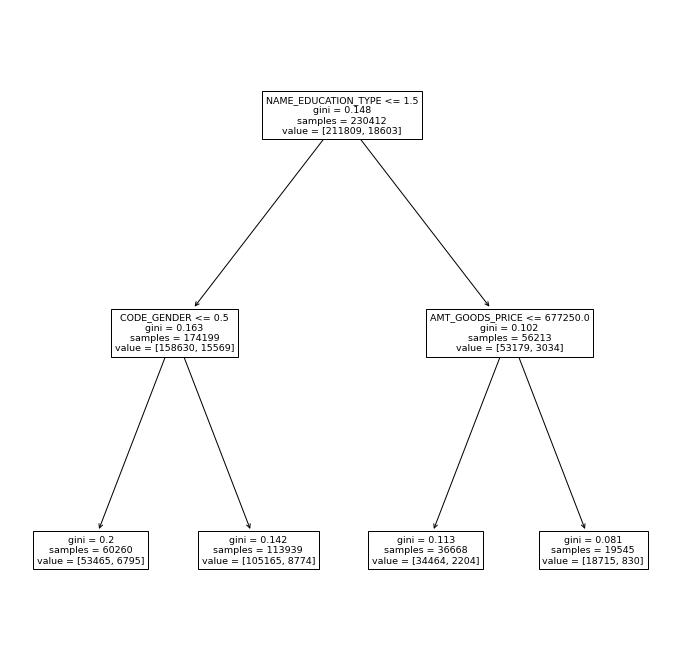

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
_ = plot_tree(small_dt, feature_names=features.columns)
plt.savefig('B17030_15_02.png', facecolor='w')

# Random forests

## sklearn

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.9192880579136503
0.9192630688106244


In [17]:
features.shape

(307217, 10)

In [18]:
from sklearn.model_selection import GridSearchCV

x_tr_sample = x_train.sample(1000)
y_tr_sample = y_train.loc[x_tr_sample.index]

params = {'n_estimators': [100, 300, 500],
         'max_depth': [10, 15, 20],
         'max_features': [3, 6, 9],
         'random_state': [42],
         'n_jobs': [-1]}
gs = GridSearchCV(RandomForestClassifier(), param_grid=params)
gs.fit(x_tr_sample, y_tr_sample)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 6, 9],
                         'n_estimators': [100, 300, 500], 'n_jobs': [-1],
                         'random_state': [42]})

In [19]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, n_jobs=-1, random_state=42)

In [20]:
gs.best_score_

0.925

## H2O random forests

In [21]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15+36-1562, mixed mode, sharing)
  Starting server from C:\Users\words\anaconda3\envs\datasci\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\words\AppData\Local\Temp\tmptjv1h86t
  JVM stdout: C:\Users\words\AppData\Local\Temp\tmptjv1h86t\h2o_words_started_from_python.out
  JVM stderr: C:\Users\words\AppData\Local\Temp\tmptjv1h86t\h2o_words_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_words_rary27
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.977 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [22]:
hf = h2o.H2OFrame(df)
hf['TARGET'] = hf['TARGET'].asfactor()
train, valid = hf.split_frame(ratios=[.8], seed=42)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
hf.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_EDUCATION_TYPE']

In [24]:
from h2o.estimators import H2ORandomForestEstimator

drf = H2ORandomForestEstimator(ntrees=100, max_depth=10, mtries=3)
feature_columns = hf.columns
feature_columns.remove('TARGET')
target_column = 'TARGET'
drf.train(x=feature_columns, y=target_column, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
drf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1620516645886_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,733165.0,10.0,10.0,10.0,402.0,728.0,578.66




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07235519385341195
RMSE: 0.2689892076894758
LogLoss: 0.27000139250562105
Mean Per-Class Error: 0.39431590498126956
AUC: 0.6433705027241998
AUCPR: 0.13934196839364615
Gini: 0.28674100544839964

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10457777806107614: 


,,0,1,Error,Rate
0,0,183565.0,42807.0,0.1891,(42807.0/226372.0)
1,1,12420.0,7382.0,0.6272,(12420.0/19802.0)
2,Total,195985.0,50189.0,0.2243,(55227.0/246174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.104578,0.210941,173.0
1,max f2,0.070084,0.333889,264.0
2,max f0point5,0.131853,0.182279,120.0
3,max accuracy,0.518722,0.919557,0.0
4,max precision,0.245683,0.281250,14.0
5,max recall,0.000912,1.000000,399.0
6,max specificity,0.518722,0.999996,0.0
7,max absolute_mcc,0.095768,0.124122,193.0
8,max min_per_class_accuracy,0.078854,0.600697,237.0
9,max mean_per_class_accuracy,0.083693,0.605684,224.0



Gains/Lift Table: Avg response rate:  8.04 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.187486,3.166012,3.166012,0.254671,0.204719,0.254671,0.204719,0.031663,0.031663,216.601245,216.601245,0.023557
1,2,0.020002,0.173188,2.418692,2.792352,0.194557,0.179617,0.224614,0.192168,0.024189,0.055853,141.869213,179.235229,0.038987
2,3,0.030003,0.165524,2.302555,2.629086,0.185215,0.169034,0.211481,0.184457,0.023028,0.078881,130.255451,162.908636,0.053153
3,4,0.040000,0.159231,2.202460,2.522462,0.177164,0.162376,0.202904,0.178938,0.022018,0.100899,120.245986,152.246223,0.066226
4,5,0.050001,0.152887,2.146021,2.447168,0.172624,0.155970,0.196848,0.174344,0.021462,0.122361,114.602120,144.716791,0.078690
5,6,0.100002,0.130074,1.889662,2.168415,0.152003,0.140715,0.174425,0.157529,0.094485,0.216847,88.966205,116.841498,0.127065
6,7,0.150000,0.115345,1.559527,1.965463,0.125447,0.122233,0.158100,0.145765,0.077972,0.294819,55.952713,96.546336,0.157487
7,8,0.200001,0.105099,1.453353,1.837433,0.116906,0.110021,0.147801,0.136829,0.072669,0.367488,45.335312,83.743320,0.182138
8,9,0.299999,0.090225,1.207978,1.627618,0.097169,0.097111,0.130924,0.123590,0.120796,0.488284,20.797842,62.761778,0.204755
9,10,0.400002,0.079673,1.024114,1.476739,0.082379,0.084641,0.118787,0.113852,0.102414,0.590698,2.411402,47.673877,0.207378




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.07345443684789223
RMSE: 0.2710247900984193
LogLoss: 0.27301901062718187
Mean Per-Class Error: 0.38908246203557684
AUC: 0.6480221753807544
AUCPR: 0.14474990202021698
Gini: 0.2960443507615087

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09804750418733982: 


,,0,1,Error,Rate
0,0,43634.0,12680.0,0.2252,(12680.0/56314.0)
1,1,2893.0,2130.0,0.576,(2893.0/5023.0)
2,Total,46527.0,14810.0,0.2539,(15573.0/61337.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.098048,0.214794,181.0
1,max f2,0.074508,0.341535,244.0
2,max f0point5,0.149372,0.186146,87.0
3,max accuracy,0.417042,0.918092,0.0
4,max precision,0.224617,0.354167,16.0
5,max recall,0.002102,1.000000,398.0
6,max specificity,0.417042,0.999982,0.0
7,max absolute_mcc,0.093383,0.128802,192.0
8,max min_per_class_accuracy,0.079099,0.608600,230.0
9,max mean_per_class_accuracy,0.081675,0.610918,222.0



Gains/Lift Table: Avg response rate:  8.19 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.187732,3.142303,3.142303,0.257329,0.204406,0.257329,0.204406,0.031455,0.031455,214.230306,214.230306,0.023358
1,2,0.020004,0.173546,2.509975,2.826397,0.205546,0.179623,0.231459,0.192024,0.025085,0.056540,150.997516,182.639678,0.039795
2,3,0.030031,0.165130,2.481957,2.711397,0.203252,0.168926,0.222041,0.184312,0.024886,0.081425,148.195698,171.139652,0.055979
3,4,0.040008,0.158659,2.314547,2.612427,0.189542,0.161940,0.213936,0.178733,0.023094,0.104519,131.454655,161.242660,0.070265
4,5,0.050002,0.152566,2.131487,2.516301,0.174551,0.155454,0.206065,0.174080,0.021302,0.125821,113.148684,151.630137,0.082582
5,6,0.100005,0.129747,1.807596,2.161949,0.148027,0.140468,0.177046,0.157274,0.090384,0.216205,80.759624,116.194881,0.126565
6,7,0.150007,0.114725,1.628429,1.984109,0.133355,0.121711,0.162482,0.145420,0.081425,0.297631,62.842921,98.410894,0.160791
7,8,0.200010,0.104448,1.353706,1.826508,0.110858,0.109429,0.149576,0.136422,0.067689,0.365320,35.370644,82.650832,0.180055
8,9,0.299998,0.090172,1.320079,1.657717,0.108104,0.096852,0.135753,0.123234,0.131993,0.497312,32.007898,65.771689,0.214914
9,10,0.400003,0.079599,1.041160,1.503571,0.085262,0.084538,0.123130,0.113559,0.104121,0.601433,4.115951,50.357126,0.219397




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-08 17:30:56,0.168 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-05-08 17:30:56,1.008 sec,1.0,0.270439,0.332261,0.619997,0.124993,2.241513,0.286783,0.273193,0.327685,0.626384,0.128066,2.214878,0.285619
2,,2021-05-08 17:30:57,1.770 sec,2.0,0.271202,0.318250,0.622017,0.127114,2.515044,0.221573,0.271938,0.279508,0.635029,0.134116,2.342967,0.216851
3,,2021-05-08 17:30:58,2.244 sec,3.0,0.270894,0.303420,0.621602,0.125169,2.294790,0.227584,0.271584,0.276051,0.639293,0.136073,2.320330,0.226976
4,,2021-05-08 17:30:58,2.604 sec,4.0,0.270225,0.294776,0.625573,0.126893,2.235208,0.237600,0.271412,0.275082,0.642583,0.137143,2.303256,0.251137
5,,2021-05-08 17:30:58,2.823 sec,5.0,0.269971,0.288988,0.626820,0.127435,2.263531,0.238033,0.271370,0.274536,0.641680,0.137643,2.468426,0.234035
6,,2021-05-08 17:30:58,3.020 sec,6.0,0.269651,0.285223,0.628887,0.129421,2.413643,0.256224,0.271222,0.274149,0.642675,0.139556,2.547247,0.261294
7,,2021-05-08 17:30:59,3.222 sec,7.0,0.269488,0.282671,0.631092,0.130288,2.390154,0.216249,0.271209,0.274066,0.643412,0.139751,2.724682,0.259648
8,,2021-05-08 17:30:59,3.416 sec,8.0,0.269715,0.281193,0.631319,0.130439,2.446008,0.233028,0.271225,0.274132,0.642508,0.139783,2.766606,0.237524
9,,2021-05-08 17:30:59,3.684 sec,9.0,0.269631,0.277684,0.632943,0.131174,2.448989,0.244649,0.271144,0.273937,0.643586,0.141950,2.988485,0.264082



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AMT_GOODS_PRICE,7325.336426,1.000000,0.191926
1,AMT_CREDIT,6579.075195,0.898126,0.172374
2,AMT_ANNUITY,6121.027344,0.835597,0.160373
3,NAME_EDUCATION_TYPE,4643.999023,0.633964,0.121674
4,CODE_GENDER,4339.110840,0.592343,0.113686
5,AMT_INCOME_TOTAL,2888.729980,0.394348,0.075686
6,CNT_CHILDREN,2252.657227,0.307516,0.059020
7,FLAG_OWN_CAR,2158.531494,0.294667,0.056554
8,NAME_CONTRACT_TYPE,1241.268555,0.169449,0.032522
9,FLAG_OWN_REALTY,617.810242,0.084339,0.016187


In [26]:
drf.F1()

[[0.10457777806107614, 0.21094140675229672]]

In [27]:
drf.model_performance(valid).F1()

[[0.09804750418733982, 0.2147935259416125]]

In [28]:
predictions = drf.predict(train)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [29]:
predictions

predict,p0,p1
1,0.829555,0.170445
0,0.949441,0.0505592
0,0.929537,0.0704635
0,0.906115,0.0938852
1,0.880359,0.119641
1,0.859096,0.140904
0,0.970192,0.029808
0,0.961697,0.038303
0,0.935468,0.064532
0,0.933588,0.0664118


In [30]:
(predictions['p1'] > 0.097).as_data_frame()['p1'].values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
save_path = h2o.save_model(model=drf, path='drf', force=True)

In [32]:
drf2 = h2o.load_model(path=save_path)

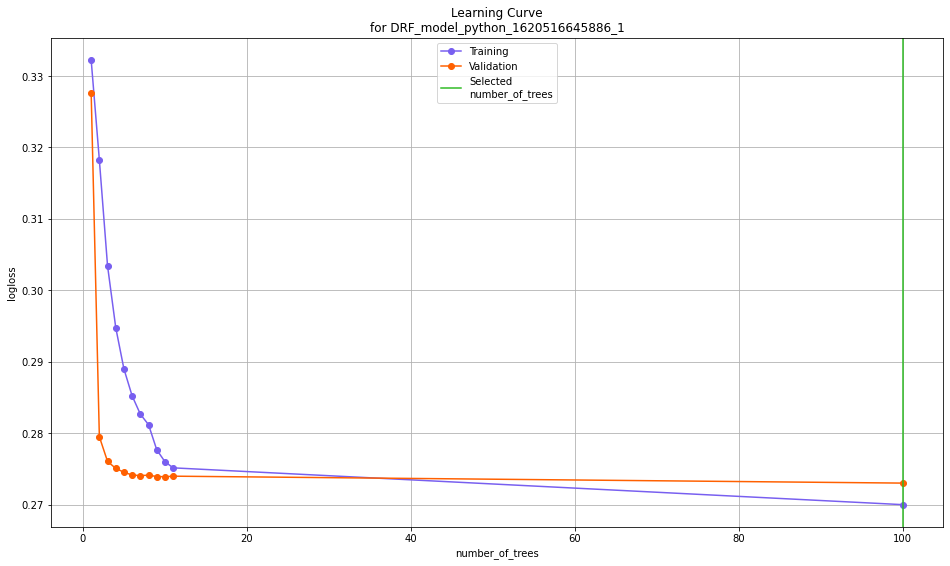

In [33]:
# if we don't save the output to the variable, the plot shows up twice
lc = drf.learning_curve_plot()

# Variable importances

In [34]:
drf.varimp()

[('AMT_GOODS_PRICE', 7325.33642578125, 1.0, 0.19192578855539125),
 ('AMT_CREDIT', 6579.0751953125, 0.8981260126371382, 0.17237354319749204),
 ('AMT_ANNUITY', 6121.02734375, 0.8355967546019144, 0.16037256604129818),
 ('NAME_EDUCATION_TYPE',
  4643.9990234375,
  0.633963923771899,
  0.12167402598559168),
 ('CODE_GENDER', 4339.11083984375, 0.5923428751439197, 0.11368587340716446),
 ('AMT_INCOME_TOTAL',
  2888.72998046875,
  0.39434775586578824,
  0.07568550400959032),
 ('CNT_CHILDREN', 2252.6572265625, 0.30751587307776834, 0.0590202264337503),
 ('FLAG_OWN_CAR', 2158.531494140625, 0.29466653388692887, 0.05655410687713274),
 ('NAME_CONTRACT_TYPE',
  1241.2685546875,
  0.1694486754654573,
  0.03252157065837447),
 ('FLAG_OWN_REALTY',
  617.8102416992188,
  0.08433882156249622,
  0.016186794834214525)]

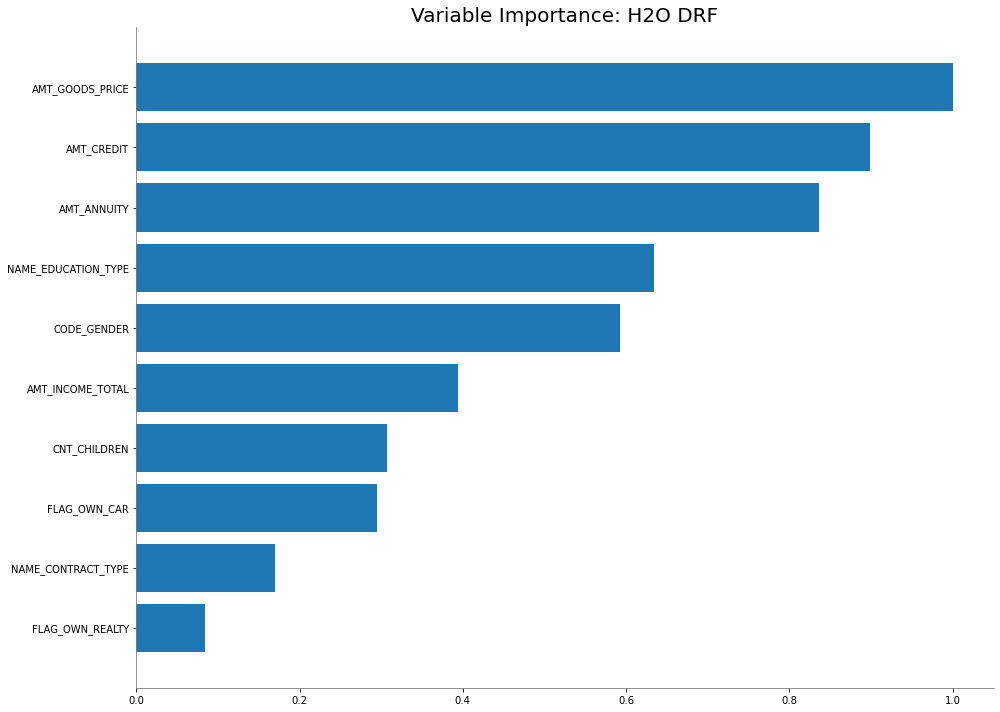

In [35]:
f = plt.figure(figsize=(5.5, 5.5))
drf.varimp_plot(server=True)
plt.tight_layout()
plt.savefig('B17030_15_03.png', dpi=300, facecolor='w')

## sklearn feature importances

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


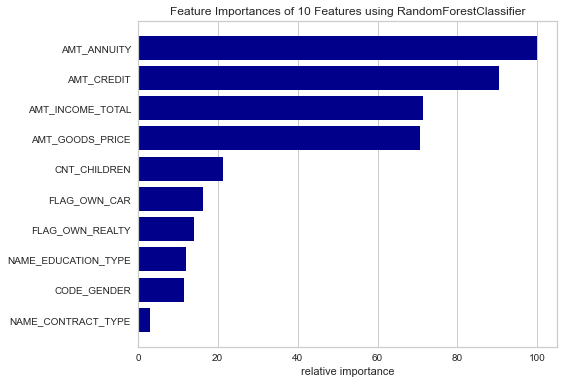

In [36]:
from yellowbrick.model_selection import feature_importances

_ = feature_importances(gs.best_estimator_, x_train, y_train, colors=['darkblue'] * features.shape[0])
plt.tight_layout()
plt.savefig('B17030_15_04.png', dpi=300)

# Boosting

## AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
adaboost.fit(x_train, y_train)
print(adaboost.score(x_train, y_train))
print(adaboost.score(x_test, y_test))

0.9192620176032499
0.9192630688106244


In [58]:
from pycaret.classification import setup, create_model, tune_model

# only use use_gpu=True if you have a GPU that can be used for fitting the models
classification = setup(data=numeric_df, target='TARGET')#, use_gpu=True)

,Description,Value
0,session_id,3961
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(307217, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
adaboost = create_model('ada', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9195,0.6348,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9195,0.6346,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9195,0.6427,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9195,0.6374,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0037,0.0000,0.0000,0.0000,0.0000,0.0000


In [40]:
tuned_adaboost, gridsearch = tune_model(adaboost, fold=3, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9195,0.5425,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9195,0.5445,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9195,0.5508,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9195,0.5459,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0035,0.0000,0.0000,0.0000,0.0000,0.0000


In [41]:
tuned_adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.0001,
 'n_estimators': 70,
 'random_state': 4204}

In [42]:
gridsearch.cv_results_['mean_test_score']

array([0.91947957, 0.91947957, 0.91947957, 0.91947957, 0.91947957,
       0.91947957, 0.91947957, 0.91947957, 0.91947492, 0.91947957])

## XGBoost

In [43]:
xgb = create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9194,0.6452,0.0002,0.1429,0.0003,0.0002,0.0023
1,0.9195,0.6538,0.0007,0.4444,0.0014,0.0011,0.0150
2,0.9193,0.6550,0.0009,0.2000,0.0017,0.0010,0.0082
Mean,0.9194,0.6513,0.0006,0.2624,0.0012,0.0008,0.0085
SD,0.0001,0.0044,0.0003,0.1308,0.0006,0.0004,0.0052


In [44]:
best_xgb, tuner = tune_model(xgb, fold=3, search_library='scikit-optimize', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7299,0.6387,0.4357,0.1351,0.2062,0.0950,0.1188
1,0.7259,0.6453,0.4446,0.1350,0.2071,0.0953,0.1202
2,0.7455,0.6496,0.4265,0.1416,0.2126,0.1043,0.1270
Mean,0.7338,0.6445,0.4356,0.1372,0.2086,0.0982,0.1220
SD,0.0085,0.0045,0.0074,0.0031,0.0028,0.0043,0.0036


In [45]:
best_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8176192267828031,
 'gamma': 0,
 'gpu_id': 0,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.0021764163659200903,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 188,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 4204,
 'reg_alpha': 0.2561391186289481,
 'reg_lambda': 0.3052625845853105,
 'scale_pos_weight': 10.22628098869957,
 'subsample': 0.21621670373150945,
 'tree_method': 'gpu_hist',
 'validate_parameters': 1,
 'verbosity': 0}

In [46]:
tuner.cv_results_['mean_test_score']

[0.5303625651589623,
 0.08530534617369834,
 0.08530534617369834,
 0.11286625033131675,
 0.7337747790059103,
 0.49727273995470844,
 0.15869258919977122,
 0.3982822679271429,
 0.18848087197920493,
 0.47550116018990846]

In [47]:
type(best_xgb)

xgboost.sklearn.XGBClassifier

In [48]:
best_xgb.get_booster().get_score(importance_type='gain')

{'CODE_GENDER_1.0': 241.85796409498644,
 'AMT_GOODS_PRICE': 62.505029270429056,
 'AMT_ANNUITY': 43.107680860180956,
 'NAME_EDUCATION_TYPE_0': 107.59148571302346,
 'AMT_INCOME_TOTAL': 27.811933192984554,
 'AMT_CREDIT': 46.95692638361854,
 'CNT_CHILDREN_1': 20.76671312324276,
 'NAME_EDUCATION_TYPE_2': 289.09990500934987,
 'FLAG_OWN_CAR_1': 52.06226472451859,
 'CNT_CHILDREN_0': 54.15303430295745,
 'CNT_CHILDREN_2': 22.64516520947531,
 'NAME_CONTRACT_TYPE_1': 71.0513012660795,
 'FLAG_OWN_REALTY_1': 18.22390819849372,
 'NAME_EDUCATION_TYPE_1': 32.590960082345674,
 'CNT_CHILDREN_3': 26.379354950000003,
 'CNT_CHILDREN_6': 5.64059448,
 'CNT_CHILDREN_4': 26.53620271769231}

In [49]:
best_xgb.feature_importances_

array([0.02420575, 0.04086834, 0.0375182 , 0.05440043, 0.06183856,
       0.2104979 , 0.0453117 , 0.01586094, 0.04713138, 0.01807403,
       0.        , 0.        , 0.        , 0.        , 0.01970892,
       0.02295892, 0.02309543, 0.        , 0.00490922, 0.        ,
       0.        , 0.09364083, 0.02836511, 0.2516143 ], dtype=float32)

In [50]:
%%time
xgboost_gpu = create_model('xgboost', fold=3, tree_method='gpu_hist', gpu_id=0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9194,0.6452,0.0002,0.1429,0.0003,0.0002,0.0023
1,0.9195,0.6538,0.0007,0.4444,0.0014,0.0011,0.0150
2,0.9193,0.6550,0.0009,0.2000,0.0017,0.0010,0.0082
Mean,0.9194,0.6513,0.0006,0.2624,0.0012,0.0008,0.0085
SD,0.0001,0.0044,0.0003,0.1308,0.0006,0.0004,0.0052


Wall time: 11.2 s


In [51]:
light_gbm = create_model('lightgbm', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9195,0.6475,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9195,0.6549,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9195,0.6600,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9195,0.6541,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0051,0.0000,0.0000,0.0000,0.0000,0.0000


In [52]:
best_lgbm, tuner = tune_model(light_gbm, fold=3, search_library='scikit-optimize', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9195,0.6497,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9195,0.6548,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9195,0.6584,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9195,0.6543,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0036,0.0000,0.0000,0.0000,0.0000,0.0000


<Figure size 396x396 with 0 Axes>

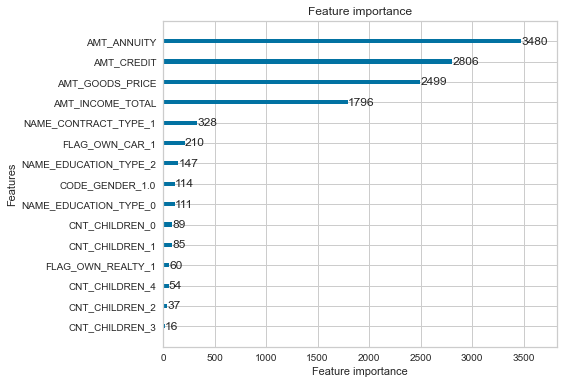

In [53]:
import lightgbm

f = plt.figure(figsize=(5.5, 5.5))
lightgbm.plot_importance(best_lgbm)
plt.tight_layout()
plt.savefig('B17030_15_05.png', dpi=300, facecolor='w')

In [54]:
best_lgbm.feature_importances_

array([1796, 2806, 3480, 2499,  328,  114,  210,   60,   89,   85,    0,
          0,    0,    0,   37,   16,   54,    0,    0,    0,    0,  111,
          0,  147])

## CatBoost

In [55]:
catboost_model = create_model('catboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9195,0.6472,0.0000,0.0000,0.0000,-0.0000,-0.0011
1,0.9195,0.6541,0.0000,0.0000,0.0000,-0.0000,-0.0011
2,0.9195,0.6553,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9195,0.6522,0.0000,0.0000,0.0000,-0.0000,-0.0007
SD,0.0000,0.0036,0.0000,0.0000,0.0000,0.0000,0.0005


In [59]:
best_cb, tuner = tune_model(catboost_model, fold=3, search_library='scikit-optimize', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9187,0.6275,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9187,0.6246,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9187,0.6297,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9187,0.6273,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0021,0.0000,0.0000,0.0000,0.0000,0.0000


## Early stopping

In [60]:
import catboost

new_cb = catboost.CatBoostClassifier(**best_cb.get_params())
new_cb.set_params(n_estimators=1000)

In [65]:
catboost.__version__

'0.25.1'

In [80]:
new_cb.fit(X=x_train, y=y_train, eval_set=(x_test, y_test), early_stopping_rounds=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [62]:
new_cb.get_params()

{'depth': 8,
 'l2_leaf_reg': 43,
 'border_count': 32,
 'verbose': False,
 'random_strength': 0.6085166589052452,
 'task_type': 'GPU',
 'n_estimators': 1000,
 'random_state': 4204,
 'eta': 2.6615779810428244e-06}

In [81]:
new_cb.tree_count_

1000